# Task 1

In [93]:
#loading data from google drive
from google.colab import drive
drive.mount('/content/drive')
!pip install python_speech_features

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import sys
import os
import pickle
import random
import operator
import math
import numpy as np
import pandas as pd
from collections import defaultdict
import sunau
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import imageio
import cv2
import seaborn as sns
import pickle
from python_speech_features import mfcc
import scipy.io.wavfile as wav
from tempfile import TemporaryFile
from imutils import paths
from pathlib import Path

In [95]:
def mfcc(rate, sig):
    mfccs = librosa.feature.mfcc(y=rate, sr=sig)
    return list(mfccs.mean(axis=1))

In [96]:
def mel(rate, sig):
    mel_spec = librosa.feature.melspectrogram(S=rate, sr=sig)
    return list(mel_spec.mean(axis=1))

In [97]:
def rmse(rate):
    return np.sqrt(np.mean(rate**2))

In [179]:
path = "/content/drive/MyDrive/instruments_dataset2/TinySOL"
df=pd.read_csv("/content/drive/MyDrive/instruments_dataset2/TinySOL_metadata.csv")
y=df['Instrument (in full)']
labels=y.unique()
labels.sort()
labels

array(['Accordion', 'Alto Saxophone', 'Bass Tuba', 'Bassoon', 'Cello',
       'Clarinet in Bb', 'Contrabass', 'Flute', 'French Horn', 'Oboe',
       'Trombone', 'Trumpet in C', 'Viola', 'Violin'], dtype=object)

In [99]:
label_no={
    'Accordion':0,
    'Alto Saxophone':1, 'Bass Tuba':2, 'Bassoon':3, 'Cello':4,
       'Clarinet in Bb':5, 'Contrabass':6, 'Flute':7, 'French Horn':8, 'Oboe':9,
       'Trombone':10, 'Trumpet in C':11, 'Viola':12, 'Violin':13
}


In [100]:
def load_wav(file_path):
    wav, _ = librosa.load(file_path)
    return wav

# Convert the waveform to a mel spectrogram
def get_melspec(waveform):
    melspec = librosa.feature.melspectrogram(
        y=waveform, sr=22050, n_mels=128)
    melspec = librosa.power_to_db(melspec, ref=np.max)
    melspec = melspec[np.newaxis,...]
    return melspec

# Preprocess a .wav file
def preprocess_wav(file_path):
    waveform = load_wav(file_path)
    melspec = get_melspec(waveform)
    return melspec


# Processing the .wav file

In [103]:
df_features = pd.DataFrame(columns = ['file_name','mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
                                          'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
                                          'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16',
                                          'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                          'rmse'])

In [104]:
path = "/content/drive/MyDrive/instruments_dataset2/TinySOL"
df=pd.read_csv("/content/drive/MyDrive/instruments_dataset2/TinySOL_metadata.csv")
os.chdir(path)
df1= []
for p in df['Path']:
    file=os.path.join(path, p)
    x , sr = librosa.load(p)
    row = []
    row.append(file)
    row.extend(mfcc(x, sr))
    row.append(rmse(x))
    df_features.loc[len(df_features)] = row



In [105]:
df_features.head

<bound method NDFrame.head of                                               file_name       mfcc1  \
0     /content/drive/MyDrive/instruments_dataset2/Ti... -797.574829   
1     /content/drive/MyDrive/instruments_dataset2/Ti... -782.177429   
2     /content/drive/MyDrive/instruments_dataset2/Ti... -738.692139   
3     /content/drive/MyDrive/instruments_dataset2/Ti... -781.100708   
4     /content/drive/MyDrive/instruments_dataset2/Ti... -746.435425   
...                                                 ...         ...   
2908  /content/drive/MyDrive/instruments_dataset2/Ti... -488.403595   
2909  /content/drive/MyDrive/instruments_dataset2/Ti... -550.109741   
2910  /content/drive/MyDrive/instruments_dataset2/Ti... -515.902344   
2911  /content/drive/MyDrive/instruments_dataset2/Ti... -512.706665   
2912  /content/drive/MyDrive/instruments_dataset2/Ti... -514.585205   

           mfcc2       mfcc3      mfcc4      mfcc5      mfcc6      mfcc7  \
0     156.304169  113.174820  71.380844  

In [180]:
X = df_features.iloc[:,1:]
X=np.array(X)

from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
y=np.array(y)

y1=[]

for val in y:
  y1.append(label_no[val])
y=y1
y=np.array(y)
X_n=df_features.iloc[:,1:]
X_n=np.array(X_n)
Y_n=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42,stratify=y)
print(y)

[2 2 2 ... 9 9 9]


In [181]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
X = X[..., np.newaxis]
X_n = X_n[..., np.newaxis]
X_train=np.array(X_train)

X_test=np.array(X_test)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape



(2621, 21, 1)

# CNN Model 1 with correct labels

In [182]:

input_shape = (X_train.shape[1], X_train.shape[2], 1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout ,BatchNormalization
#cnn pooling batch flat dense batch drop out dense
from keras.optimizers import SGD
CNNmodel = Sequential()
CNNmodel.add(Conv2D(16, (3, 3), activation='relu',padding='same',strides=(1,1), input_shape=input_shape))
CNNmodel.add(Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1,1)))
CNNmodel.add(Conv2D(64, (3, 3), activation='relu',padding='same',strides=(1,1)))
CNNmodel.add(Conv2D(128, (3, 3), activation='relu',padding='same',strides=(1,1)))

CNNmodel.add(MaxPooling2D((2, 2), padding='same'))
CNNmodel.add(Dropout(0.3))
CNNmodel.add(Flatten())

CNNmodel.add(Dense(128, activation='relu'))
CNNmodel.add(Dense(64, activation='relu'))
CNNmodel.add(Dense(14, activation='softmax'))

opt = SGD(learning_rate=0.01)
CNNmodel.compile(optimizer=opt, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
CNNmodel.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 21, 1, 16)         160       
                                                                 
 conv2d_38 (Conv2D)          (None, 21, 1, 32)         4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 21, 1, 64)         18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 21, 1, 128)        73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 11, 1, 128)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 11, 1, 128)        0         
                                                     

In [183]:
history = CNNmodel.fit(X_train, y_train,batch_size=10, epochs=30,validation_split=0.1)

Epoch 1/30
236/236 [==============================] - 3s 7ms/step - loss: 2.0831 - accuracy: 0.3304 - val_loss: 1.2606 - val_accuracy: 0.5817
Epoch 2/30
236/236 [==============================] - 1s 6ms/step - loss: 1.0614 - accuracy: 0.6590 - val_loss: 0.8220 - val_accuracy: 0.7376
Epoch 3/30
236/236 [==============================] - 2s 7ms/step - loss: 0.6756 - accuracy: 0.7672 - val_loss: 0.4541 - val_accuracy: 0.8631
Epoch 4/30
236/236 [==============================] - 2s 7ms/step - loss: 0.5199 - accuracy: 0.8338 - val_loss: 0.3891 - val_accuracy: 0.8517
Epoch 5/30
236/236 [==============================] - 1s 5ms/step - loss: 0.3991 - accuracy: 0.8677 - val_loss: 0.4959 - val_accuracy: 0.8327
Epoch 6/30
236/236 [==============================] - 1s 5ms/step - loss: 0.3120 - accuracy: 0.8974 - val_loss: 0.2825 - val_accuracy: 0.9087
Epoch 7/30
236/236 [==============================] - 1s 5ms/step - loss: 0.2629 - accuracy: 0.9139 - val_loss: 0.2758 - val_accuracy: 0.9163
Epoch 

In [184]:
scores = CNNmodel.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.09894275665283203, 0.9760273694992065]


In [216]:
def plot_history(history):
    fig, axs = plt.subplots(2)
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
def plot_history1(history1, history2):
    plt.figure()

    fig, axs = plt.subplots(2)
    axs[0].plot(history1.history["accuracy"], label="CNN1 train accuracy ")
    axs[0].plot(history2.history["accuracy"], label="CNN2 train accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    # create error sublpot
    axs[1].plot(history1.history["loss"], label="CNN1 train error")
    axs[1].plot(history2.history["loss"], label="CNN1 train error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.legend()


    plt.show()


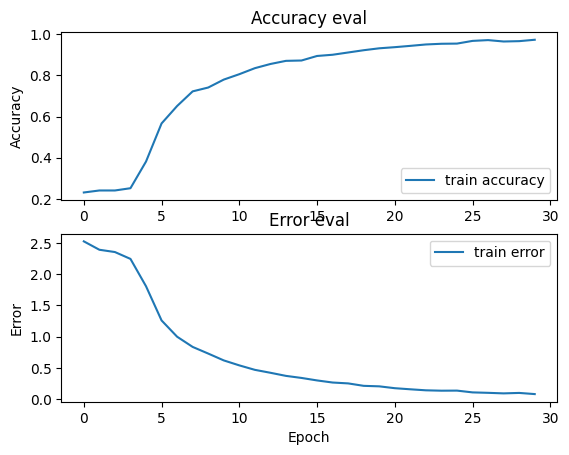

In [165]:
plot_history(history)


In [166]:
def get_index(row):
  c=0
  for i in row:
    if(i==1):
      return c
    c+=1
labels.sort()


In [189]:

x1=X[0]
x1=x1[np.newaxis, ...]
prediction=CNNmodel.predict(x1)

predicted_index = np.argmax(prediction, axis=1)
print('Predicted label:')
print(labels[int(predicted_index)])
print('Correct label:')
print(labels[y[0]])

1/1 [==============================] - 0s 32ms/step
Predicted label:
Bass Tuba
Correct label:
Bass Tuba


# Class with methods to return the required dictionary



In [190]:
class Dataset:
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path)
    def getItem(self, idx):
        row = self.data['Path']
        filename = row[idx]
        audio_path = os.path.join(path, filename)
        audio, sr = librosa.load(audio_path)  # Load audio using librosa
        mel = librosa.feature.melspectrogram(y=audio, sr=sr)  # Calculate mel spectrogram
        gt = self.data['Instrument (in full)'][idx]  # Get ground truth label
        x2=X_n[idx]
        x2=x2[np.newaxis, ...]
        prediction=CNNmodel.predict(x2)
        predicted_index = np.argmax(prediction, axis=1)
        print(predicted_index)
        pseudo = labels[int(predicted_index)]
        return {
            'file': filename,
            'audio': audio,
            'mel': mel,
            'gt': gt,
            'pseudo': pseudo
        }

    def __len__(self):
        return len(self.data)

In [191]:
data_set=Dataset('/content/drive/MyDrive/instruments_dataset2/TinySOL_metadata.csv')


In [195]:
data_set.getItem(0)

1/1 [==============================] - 0s 33ms/step
[2]


{'file': 'Brass/Bass_Tuba/ordinario/BTb-ord-F#1-pp-N-N.wav',
 'audio': array([ 9.0364410e-06,  1.0625277e-05, -1.9754421e-05, ...,
        -2.0267976e-06,  8.9964906e-06,  1.0077964e-05], dtype=float32),
 'mel': array([[4.1277934e-05, 3.4523957e-05, 5.1945473e-05, ..., 7.1225486e-06,
         1.9935569e-06, 3.8403601e-07],
        [6.5528424e-05, 4.8994320e-05, 1.0548330e-04, ..., 7.2626895e-06,
         2.9216935e-06, 8.8409479e-07],
        [1.8278199e-04, 3.3655451e-04, 9.2636008e-04, ..., 7.6404231e-04,
         2.0815629e-04, 2.9743866e-05],
        ...,
        [6.0899428e-09, 1.1502063e-08, 1.1684174e-08, ..., 8.3008027e-09,
         7.0522863e-09, 4.3986832e-09],
        [1.7538785e-09, 5.8879577e-09, 6.9575385e-09, ..., 4.1627639e-09,
         4.4210724e-09, 4.1406203e-09],
        [2.3545402e-10, 6.2445077e-10, 5.9765548e-10, ..., 2.8745942e-10,
         2.9740901e-10, 2.0926665e-10]], dtype=float32),
 'gt': 'Bass Tuba',
 'pseudo': 'Bass Tuba'}

In [196]:
y_pseudo=[]
for i in range(X.shape[0]):
  ob=data_set.getItem(i)
  y_pseudo.append(label_no[ob['pseudo']])



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
[11]
1/1 [==============================] - 0s 26ms/step
[11]
1/1 [==============================] - 0s 29ms/step
[11]
1/1 [==============================] - 0s 25ms/step
[11]
1/1 [==============================] - 0s 26ms/step
[11]
1/1 [==============================] - 0s 29ms/step
[11]
1/1 [==============================] - 0s 32ms/step
[11]
1/1 [==============================] - 0s 32ms/step
[11]
1/1 [==============================] - 0s 31ms/step
[11]
1/1 [==============================] - 0s 35ms/step
[11]
1/1 [==============================] - 0s 30ms/step
[11]
1/1 [==============================] - 0s 33ms/step
[11]
1/1 [==============================] - 0s 25ms/step
[11]
1/1 [==============================] - 0s 31ms/step
[11]
1/1 [==============================] - 0s 30ms/step
[11]
1/1 [==============================] - 0s 27ms/step
[11]
1/1 [==============================] 

# CNN Model 2 with predicted labels

In [202]:
CNNmodel2 = Sequential()
CNNmodel2.add(Conv2D(16, (3, 3), activation='relu',padding='same',strides=(1,1), input_shape=input_shape))
CNNmodel2.add(Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1,1)))
CNNmodel2.add(Conv2D(64, (3, 3), activation='relu',padding='same',strides=(1,1)))
CNNmodel2.add(Conv2D(128, (3, 3), activation='relu',padding='same',strides=(1,1)))

CNNmodel2.add(MaxPooling2D((2, 2), padding='same'))
CNNmodel2.add(Dropout(0.3))
CNNmodel2.add(Flatten())

CNNmodel2.add(Dense(128, activation='relu'))
CNNmodel2.add(Dense(64, activation='relu'))
CNNmodel2.add(Dense(14, activation='softmax'))

opt = SGD(learning_rate=0.01)
CNNmodel2.compile(optimizer=opt, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
CNNmodel2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 21, 1, 16)         160       
                                                                 
 conv2d_50 (Conv2D)          (None, 21, 1, 32)         4640      
                                                                 
 conv2d_51 (Conv2D)          (None, 21, 1, 64)         18496     
                                                                 
 conv2d_52 (Conv2D)          (None, 21, 1, 128)        73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 11, 1, 128)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 11, 1, 128)        0         
                                                     

In [203]:
y_pseudo=np.array(y_pseudo)
history_1 = CNNmodel2.fit(X, y_pseudo, batch_size=10, epochs=30,validation_split=0.1)

Epoch 1/30
263/263 [==============================] - 3s 6ms/step - loss: 1.6843 - accuracy: 0.4369 - val_loss: 8.9087 - val_accuracy: 0.0034
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 0.7976 - accuracy: 0.7283 - val_loss: 26.8663 - val_accuracy: 0.0000e+00
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 0.5719 - accuracy: 0.8153 - val_loss: 18.6037 - val_accuracy: 0.0137
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 0.4507 - accuracy: 0.8516 - val_loss: 10.1926 - val_accuracy: 0.0890
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 0.3014 - accuracy: 0.8997 - val_loss: 12.8265 - val_accuracy: 0.0240
Epoch 6/30
263/263 [==============================] - 2s 7ms/step - loss: 0.2386 - accuracy: 0.9206 - val_loss: 11.9649 - val_accuracy: 0.0753
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 0.1851 - accuracy: 0.9386 - val_loss: 11.9783 - val_accuracy: 0.0

[1.9999767541885376, 0.8938356041908264]


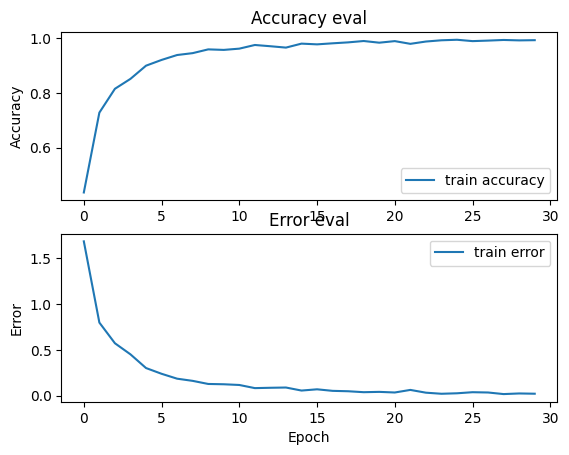

In [206]:

scores1 = CNNmodel2.evaluate(X_test, y_test, verbose=0)
print(scores1)
plot_history(history_1)


<Figure size 640x480 with 0 Axes>

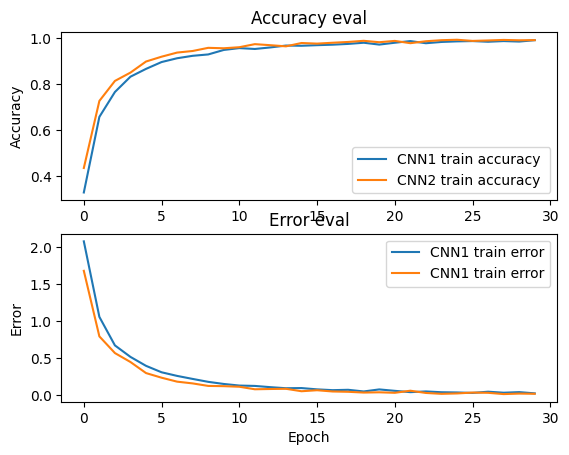

In [217]:
plot_history1(history,history_1)

# To improve performance in step 4 , we can use following methods-


1.   Splitting the audiofiles into smaller parts , to increase traing data
2.   Remove the silence in audio
3.   Early stopping




